<a href="https://colab.research.google.com/github/fsenchyna/CSC869_Term_Project/blob/fiona/ProjectBeehive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import itertools
from itertools import cycle
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/beehives.zip'

In [4]:
!cp "{zip_path}" .
!unzip -q beehives.zip
!rm beehives.zip

In [5]:
train_path = 'beehives/Train'
valid_path = 'beehives/Validate'
test_path = 'beehives/Test'

In [6]:
label_lst=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed','MissingQueen', 'VarroaSmallHiveBeetles']

# Train
print('For training:')
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224, 224), classes= label_lst, batch_size=10)

# Validate
print('\nFor validation:')
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224, 224), classes= label_lst, batch_size=10)

#Test
print('\nFor testing:')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224, 224), classes= label_lst, batch_size=10, shuffle=False)



For training:
Found 3566 images belonging to 6 classes.

For validation:
Found 1027 images belonging to 6 classes.

For testing:
Found 579 images belonging to 6 classes.


In [7]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

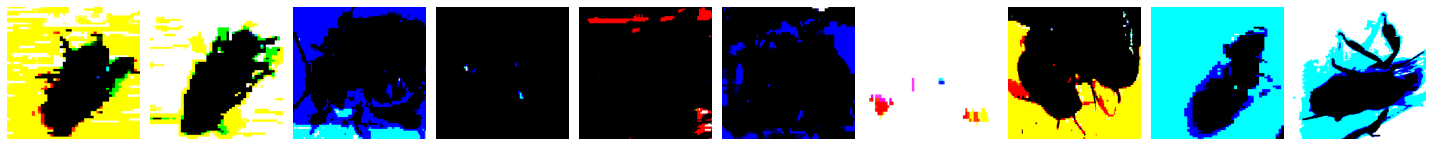

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


In [8]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [9]:
# Building the classifier/model
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(units=6, activation='softmax'),
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
357/357 - 40s - loss: 6.5115 - accuracy: 0.8320 - val_loss: 4.8343 - val_accuracy: 0.7322
Epoch 2/10
357/357 - 7s - loss: 0.2978 - accuracy: 0.9473 - val_loss: 3.1629 - val_accuracy: 0.7429
Epoch 3/10
357/357 - 7s - loss: 0.0801 - accuracy: 0.9748 - val_loss: 1.5879 - val_accuracy: 0.8325
Epoch 4/10
357/357 - 7s - loss: 0.0420 - accuracy: 0.9874 - val_loss: 1.5319 - val_accuracy: 0.8617
Epoch 5/10
357/357 - 7s - loss: 0.0646 - accuracy: 0.9840 - val_loss: 1.4337 - val_accuracy: 0.8199
Epoch 6/10
357/357 - 7s - loss: 0.0075 - accuracy: 0.9972 - val_loss: 1.6206 - val_accuracy: 0.7722
Epoch 7/10
357/357 - 7s - loss: 0.1100 - accuracy: 0.9776 - val_loss: 4.5094 - val_accuracy: 0.7877
Epoch 8/10
357/357 - 7s - loss: 0.0715 - accuracy: 0.9835 - val_loss: 3.5663 - val_accuracy: 0.7624
Epoch 9/10
357/357 - 7s - loss: 0.0119 - accuracy: 0.9972 - val_loss: 3.8932 - val_accuracy: 0.7838
Epoch 10/10
357/357 - 7s - loss: 4.0602e-04 - accuracy: 1.0000 - val_loss: 3.8427 - val_accuracy: 0

In [12]:
predictions = model.predict(x=test_batches, verbose=0).argmax(axis=1)

In [13]:
np.round(predictions)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2, 5, 5, 1, 1, 1, 1, 1, 1, 5,
       5, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 5, 5, 5, 1, 1, 2, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
def plot_confusion_matrix(cm,classes,title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.figure(figsize=(7,7)) # to increase figure(confusion matrix) size

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title=(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=70)
  plt.yticks(tick_marks,classes)
  thresh = cm.max() / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

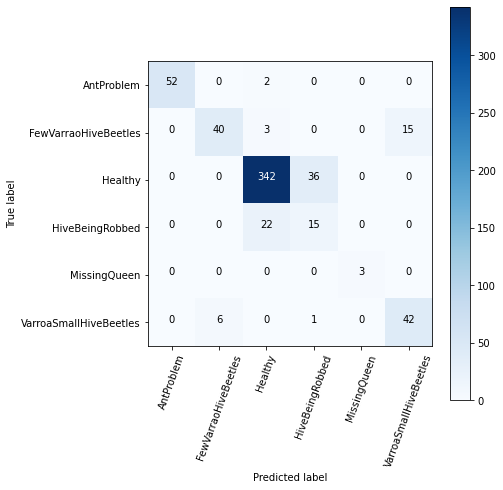

In [15]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=(predictions))
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=cm_plot_labels)
# disp.plot()
plot_confusion_matrix(cm, label_lst)

## Calculating the Precision, Recall, Accuracy, and the F1-Score

In [16]:
rpt = classification_report(y_true=test_batches.classes,y_pred=(predictions), target_names=label_lst)
print(rpt)

                        precision    recall  f1-score   support

            AntProblem       1.00      0.96      0.98        54
  FewVarraoHiveBeetles       0.87      0.69      0.77        58
               Healthy       0.93      0.90      0.92       378
       HiveBeingRobbed       0.29      0.41      0.34        37
          MissingQueen       1.00      1.00      1.00         3
VarroaSmallHiveBeetles       0.74      0.86      0.79        49

              accuracy                           0.85       579
             macro avg       0.80      0.80      0.80       579
          weighted avg       0.87      0.85      0.86       579



In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_true=test_batches.classes,y_pred=(predictions), average=None)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))
precision

Precision : [1.         0.86956522 0.92682927 0.28846154 1.         0.73684211]
Recall    : [0.96296296 0.68965517 0.9047619  0.40540541 1.         0.85714286]
F-score   : [0.98113208 0.76923077 0.91566265 0.33707865 1.         0.79245283]
Support   : [ 54  58 378  37   3  49]


array([1.        , 0.86956522, 0.92682927, 0.28846154, 1.        ,
       0.73684211])

# One-vs-the-rest (OvR) multiclass strategy for ROC and AUC

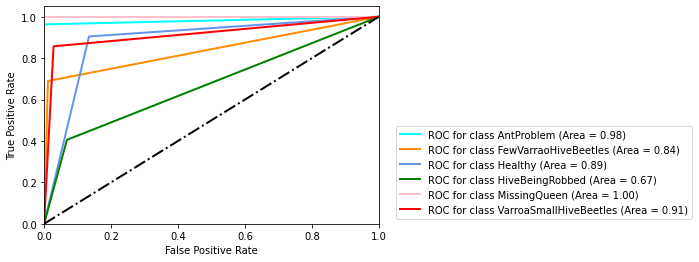

In [18]:
# Compute ROC curve and ROC area for each class
y_score = label_binarize(predictions, classes = [0, 1, 2, 3, 4, 5])
y_test = label_binarize(test_batches.classes, classes = [0, 1, 2, 3, 4, 5])
# Plot linewidth.
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_lst)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(1)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'pink', 'red'])
for i, color in zip(range(len(label_lst)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC for class {0} (Area = {1:0.2f})'
             ''.format(label_lst[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k-.', lw=lw, )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', bbox_to_anchor=(1.95, 0))
plt.show()